In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense ,Dropout
from keras.optimizers import Adam
import time

In [2]:
# Load the dataset
df = pd.read_csv('water_quality_dataset.csv')

In [3]:
# Split the dataset into input (X) and output (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
X.shape

(1781, 7)

In [5]:
y.shape

(1781,)

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape

(1424, 7)

In [8]:
X_test.shape

(357, 7)

In [9]:
y_train.shape

(1424,)

In [10]:
y_test.shape

(357,)

In [11]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X_train.shape

(1424, 7)

In [13]:
X_test.shape

(357, 7)

In [14]:
# Reshape the input features for use with CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [15]:
X_train.shape

(1424, 7, 1)

In [16]:
X_test.shape

(357, 7, 1)

In [29]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [30]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [31]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 6, 32)             96        
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 6, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_16 (Conv1D)          (None, 5, 64)             4160      
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 5, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_17 (Conv1D)          (None, 4, 128)            16512     
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 4, 128)          

In [32]:
# Enregistrer les temps de départ
step_times = []

# Définir un callback pour mesurer les temps de chaque étape
class TimingCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        step_time = time.time() - self.start_time
        step_times.append(step_time)
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),callbacks=[TimingCallback()])


Epoch 1/100
45/45 [==============================] - 1s 14ms/step - loss: 45363.5469 - val_loss: 39289.4688
Epoch 2/100
45/45 [==============================] - 0s 7ms/step - loss: 14874.8389 - val_loss: 13738.0293
Epoch 3/100
45/45 [==============================] - 0s 7ms/step - loss: 7337.4663 - val_loss: 7994.7095
Epoch 4/100
45/45 [==============================] - 0s 7ms/step - loss: 5288.6899 - val_loss: 4356.9497
Epoch 5/100
45/45 [==============================] - 0s 6ms/step - loss: 3187.5232 - val_loss: 2798.7195
Epoch 6/100
45/45 [==============================] - 0s 6ms/step - loss: 1639.0370 - val_loss: 1584.3953
Epoch 7/100
45/45 [==============================] - 0s 5ms/step - loss: 898.6829 - val_loss: 544.0734
Epoch 8/100
45/45 [==============================] - 0s 5ms/step - loss: 442.2943 - val_loss: 446.2436
Epoch 9/100
45/45 [==============================] - 0s 5ms/step - loss: 253.8401 - val_loss: 162.7927
Epoch 10/100
45/45 [==============================] - 0s

In [33]:
# Evaluate the model
mse = model.evaluate(X_test, y_test)
print('Mean squared error:', mse)

12/12 [==============================] - 0s 2ms/step - loss: 7.8708
Mean squared error: 7.870776653289795


In [34]:
# Predict the WQI for a new sample
new_sample = np.array([[7.5, 8.0, 300, 2.0, 0.5, 100, 2005]])
new_sample = scaler.transform(new_sample)
new_sample = new_sample.reshape((new_sample.shape[0], new_sample.shape[1], 1))
prediction = model.predict(new_sample)
print('Predicted WQI:', prediction[0][0])

1/1 [==============================] - 0s 97ms/step
Predicted WQI: 74.06513


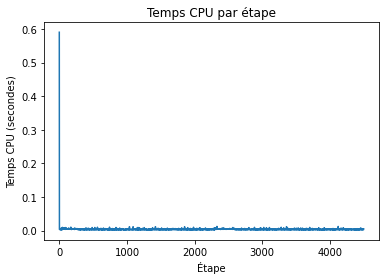

In [35]:
# Créer un graphe pour les temps CPU par epoch
import matplotlib.pyplot as plt

plt.plot(range(len(step_times)), step_times)
plt.xlabel('Étape')
plt.ylabel('Temps CPU (secondes)')
plt.title('Temps CPU par étape')
plt.show()